In [16]:
pip install altair vega_datasets

Note: you may need to restart the kernel to use updated packages.


In [6]:
# https://www.kaggle.com/gulsahdemiryurek/mobile-price-classification-with-svm
# get data for mobile classification data below.
# https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC

In [5]:
df_train = pd.read_csv("D:/Data_Science/Datasets/mobile_train.csv")
df_test = pd.read_csv("D:/Data_Science/Datasets/mobile_test.csv")

In [11]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
df_train.shape

(2000, 21)

Text(0.5, 1.0, 'Correlation ')

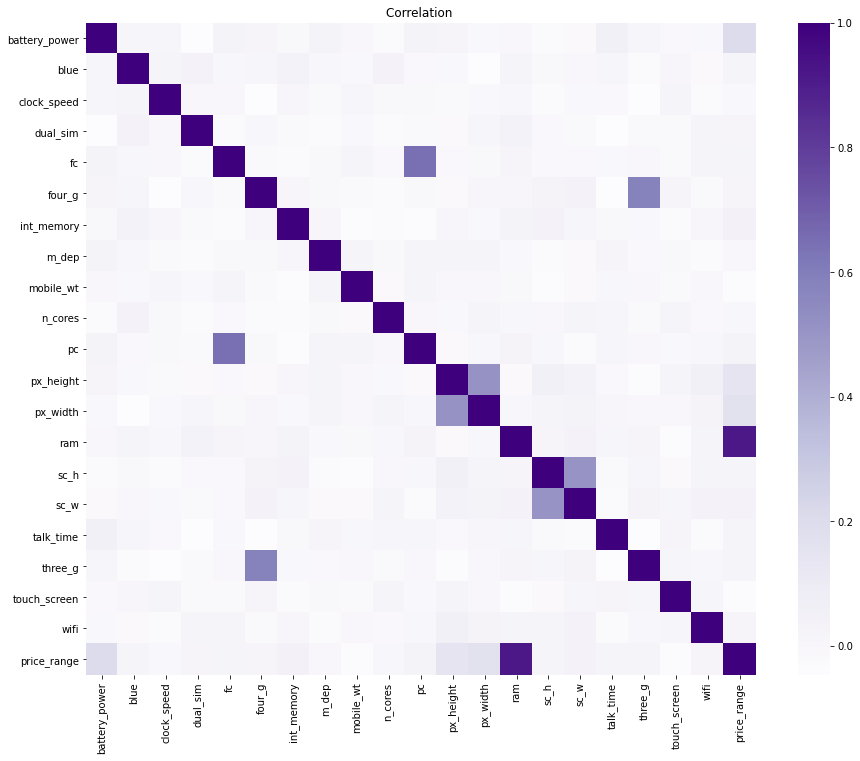

In [13]:
corr=df_train.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

As we can see our target price range has highly positive correlation between ram.

Also

3G and 4G

pc(Primary Camera mega pixels) and fc(Front Camera mega pixels)

px_weight(Pixel Resolution Width) and px_height(Pixel Resolution Height)

sc_w(Screen Width of mobile in cm) and sc_h(Screen Height of mobile in cm)

features have highly positive correlation. For example as long as sc_w (screen width of mobile) 
increase, sc_h(screen height of mobile) is increasing.

In [14]:
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [15]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


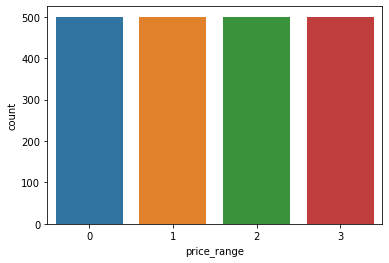

In [16]:
sns.countplot(df_train['price_range'])
plt.show()

In [17]:
df_train['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

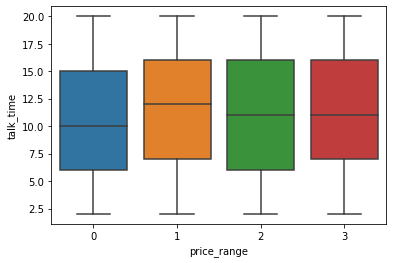

In [18]:
sns.boxplot(df_train['price_range'],df_train['talk_time'])

Phones that supports 3G

In [19]:
labels = ["3G-supported",'Not supported']
values = df_train['three_g'].value_counts().values #0-1300, 1-700

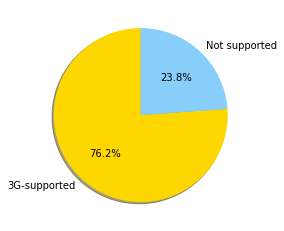

In [20]:
fig1, ax1 = plt.subplots()
colors = ['gold', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

Phones that supports 4G

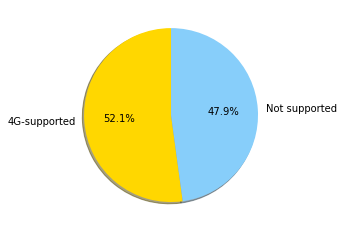

In [21]:
labels = ["4G-supported",'Not supported']
values = df_train['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['gold', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

Text(0.5, 0, 'MegaPixels')

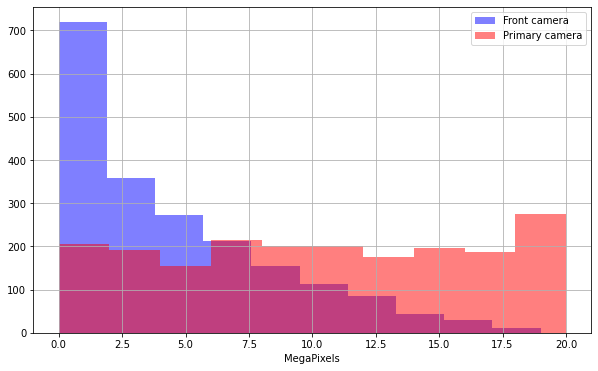

In [22]:
plt.figure(figsize=(10,6))
df_train['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df_train['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

In [6]:
scaler = StandardScaler()
x = df_train.drop('price_range',axis=1)
y = df_train['price_range'] #0, 1, 2, 3 classification clusters

scaler.fit(x)
x_transformed = scaler.transform(x)
# transforming your data into a standard scale 0-1
x_train,x_test,y_train,y_test = train_test_split(x_transformed,y,test_size=0.3)

In [7]:
#SVM

model = SVC() 
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassificationReport:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:98.57142857142858
Test Set Accuracy:88.66666666666667

Confusion Matrix:
[[131   9   0   0]
 [ 11 138   9   0]
 [  0  18 129  14]
 [  0   0   7 134]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       140
           1       0.84      0.87      0.85       158
           2       0.89      0.80      0.84       161
           3       0.91      0.95      0.93       141

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600

